### Working on logistic regression

In [36]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import load_iris 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score,roc_curve,roc_auc_score, ConfusionMatrixDisplay
%matplotlib inline

In [2]:
iris = load_iris()
X = iris.data
y = iris.target 


df = pd.DataFrame(X,columns=iris.feature_names)
df['target'] = y

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
# Selecting only two classes (for binary classification)

binary_df = df[df['target'].isin([0,1])]
X_binary = binary_df.iloc[:,:-1].values 
y_binary = binary_df['target'].values

In [24]:
cm = confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n",cm)

Confusion matrix:
 [[12  0]
 [ 0  8]]


In [27]:
precision = precision_score(y_test,y_pred)
print("\n Precision:",precision)


 Precision: 1.0


In [ ]:
recall = recall_score(y_test,y_pred)
print("Recall:", recall)

Recall: 1.0


In [29]:
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 1.0


In [13]:
X_train,X_test,y_train,y_test = train_test_split(
    X_binary,y_binary,test_size=0.2,random_state=42
)

In [14]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [17]:
y_pred = model.predict(X_test)

In [18]:
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))

Accuracy:  1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [19]:
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 1.0


AUC Score: 1.0


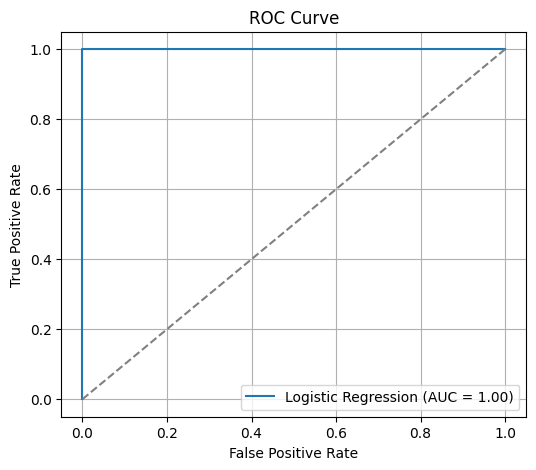

In [35]:
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC
auc = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc)

# Plot ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)

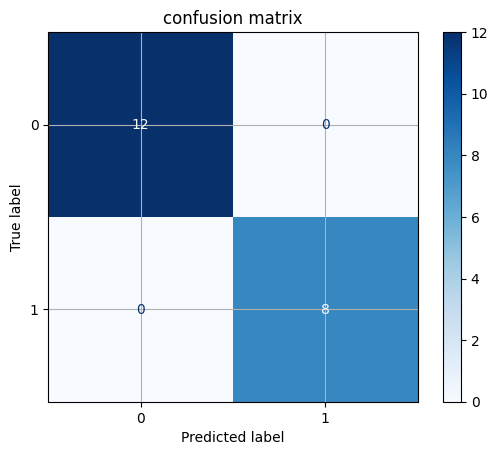

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('confusion matrix')
plt.grid(True)